In [11]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import to_categorical

%matplotlib inline

raw = mnist.load_data()
[(mat[0].shape, mat[1].shape) for mat in raw]

[((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,))]

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

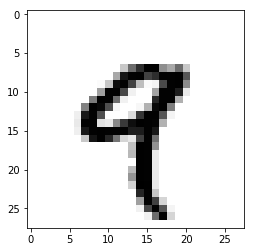

In [13]:
plt.imshow(train_images[4,:,:], cmap = plt.cm.binary)
plt.show()

In [14]:
# Reshaping datasets
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])
test_images = test_images.astype('float32')/255

# Categorizing the labels
train_labels =  to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [68]:
# Building the network
from keras import models
from keras import layers
from keras import optimizers
network = models.Sequential()

layer_sizes = [512,256,10]
input_tensors = [train_images.shape[1]] + layer_sizes[:-1]
for index, (val,size) in enumerate(zip(layer_sizes, input_tensors)):
    if index < len(layers_sizes)-1: 
        network.add(layers.Dense(val, activation = 'relu', input_shape = (size,)))
    else:
        network.add(layers.Dense(val,activation = 'softmax'))

Epoch 1/8
60000/60000 [==============================] - 3s 45us/step - loss: 2.1359 - acc: 0.3246
Epoch 2/8
60000/60000 [==============================] - 2s 30us/step - loss: 1.7503 - acc: 0.6560
Epoch 3/8
60000/60000 [==============================] - 2s 32us/step - loss: 1.3969 - acc: 0.7368
Epoch 4/8
60000/60000 [==============================] - 2s 31us/step - loss: 1.1221 - acc: 0.7770
Epoch 5/8
60000/60000 [==============================] - 2s 31us/step - loss: 0.9321 - acc: 0.8021
Epoch 6/8
60000/60000 [==============================] - 2s 39us/step - loss: 0.8029 - acc: 0.8220
Epoch 7/8
60000/60000 [==============================] - 2s 32us/step - loss: 0.7123 - acc: 0.8355
Epoch 8/8
10000/10000 [==============================] - 1s 75us/step
For learning rate:  0.0001
Test set accuracy:  0.8615
Epoch 1/8
60000/60000 [==============================] - 3s 44us/step - loss: 0.4851 - acc: 0.8766
Epoch 2/8
60000/60000 [==============================] - 2s 32us/step - loss: 0.3673

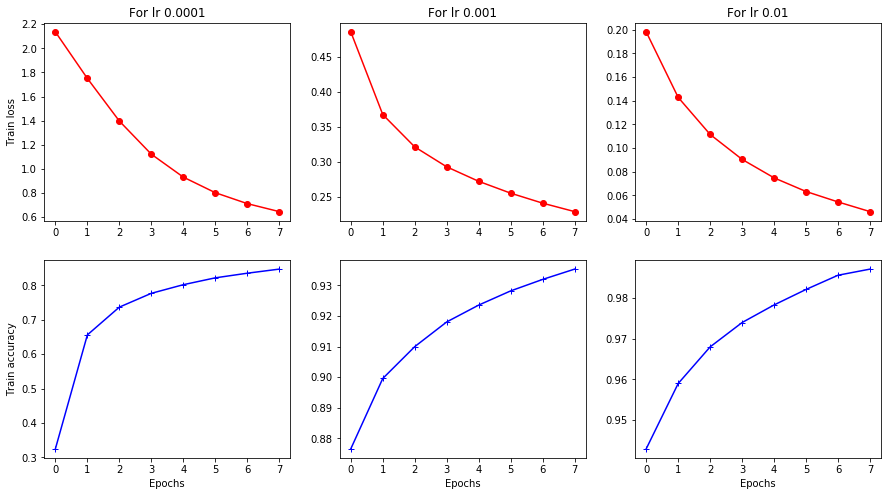

In [69]:
# Compile
lr = [0.0001,0.001,0.01]
epochs = 8
train_loss_arr = np.zeros((len(lr),epochs))
train_acc_arr = np.zeros((len(lr),epochs))
fig, ax = plt.subplots(2,3, figsize = (15,8))
for ind, val in enumerate(lr):
    network.compile(optimizer = optimizers.SGD(lr = val, momentum = 0.9, nesterov = True), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    prog = network.fit(train_images, train_labels, epochs = epochs, batch_size = 128)
    test_loss, test_acc = network.evaluate(test_images, test_labels)
    print('For learning rate: ', val)
    print('Test set accuracy: ',test_acc)
    train_loss = prog.history['loss']
    train_acc = prog.history['acc']
    
    train_loss_arr[ind,:] = np.array(train_loss).reshape((1,-1))
    train_acc_arr[ind,:] = np.array(train_acc).reshape((1,-1))
    ax[0,ind].plot(range(epochs),train_loss_arr[ind,:], '-ro')
    ax[0,ind].set_title('For lr {}'.format(str(val)))
       
    ax[1,ind].plot(range(epochs),prog.history['acc'],'-b+')
    ax[1,ind].set_xlabel('Epochs')
    if ind == 0:
        ax[0,ind].set_ylabel('Train loss')
        ax[1,ind].set_ylabel('Train accuracy')